# Python Fundamentals



In [112]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [113]:
csv1 = pd.read_csv('articleInfo.csv')
# csv1.head()
csv2 = pd.read_csv('authorInfo.csv')
# csv2.head()

mergedFile = csv1.merge(csv2, on=["Article No."])
mergedFile.head()

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,NaN
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,NaN
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,NaN
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,NaN
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,NaN


In [114]:
mergedFile.fillna(0, inplace = True)
mergedFile = mergedFile.sort_values('Year')
mergedFile.to_csv('merged_file.csv')

In [115]:
# mergedFile["Article No."].unique()

In [116]:
# mergedFile['Year'].unique()

In [117]:

modifiedFrame = mergedFile.groupby('Year')['Article No.'].nunique()
# modifiedFrame.dtypes
modifiedFrame.head()
modifiedFrame.to_csv('modFrame.csv')




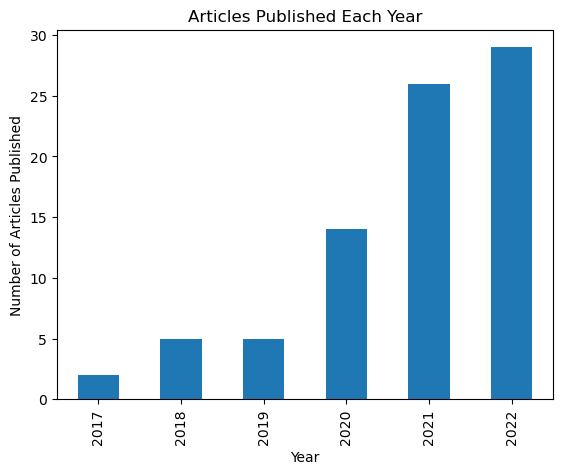

In [118]:
#modifiedFrame.plot(x = "Year", y = "Articles Published")
#columns = ["Year", "Articles"]


df = pd.read_csv("modFrame.csv")
pivot = df.groupby(['Year']).mean()
articleNum = pivot.loc[:, "Article No."]
articleNum.plot(kind = 'bar')
plt.ylabel("Number of Articles Published")
plt.title("Articles Published Each Year")
plt.show()


#print(df);
#plt.plot(df["Year"], df["Article No."]);


#plt.plot()
#plt.show()

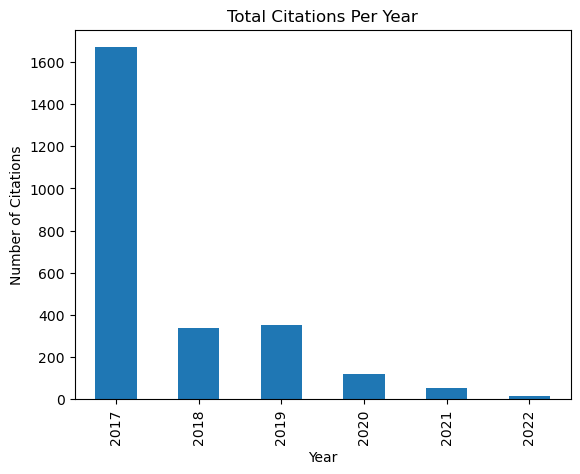

In [119]:

# nextModFrame = mergedFile.groupby('Year')['Citation'].sum()
nextModFrame = mergedFile.groupby(['Year','Article No.'])['Citation'].sum()


# nextModFrame.to_csv('totalCitationsPerYear.csv')
nextModFrame.head()
nextModFrame.to_csv('CitationsPerYear.csv')

dfile = pd.read_csv('CitationsPerYear.csv')
pivot = dfile.groupby(['Year']).mean()
articleNum = pivot.loc[:, "Citation"]
articleNum.plot(kind = 'bar')
plt.ylabel("Number of Citations")
plt.title("Total Citations Per Year")
plt.show()

In [120]:
nFrame = mergedFile.groupby('Country')['Article No.'].nunique()
nFrame.head()
nFrame.to_csv('publicationsPerCountry.csv')

<AxesSubplot:xlabel='Country', ylabel='Article No.'>

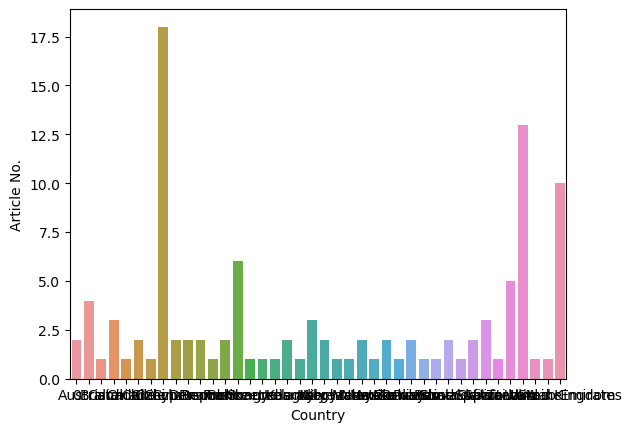

In [121]:
dataFile = pd.read_csv("publicationsPerCountry.csv")
dataFile.head()
sns.barplot(x = "Country", y = "Article No.", ci = None, data = dataFile)

<AxesSubplot:xlabel='Author Affiliation', ylabel='Article No.'>

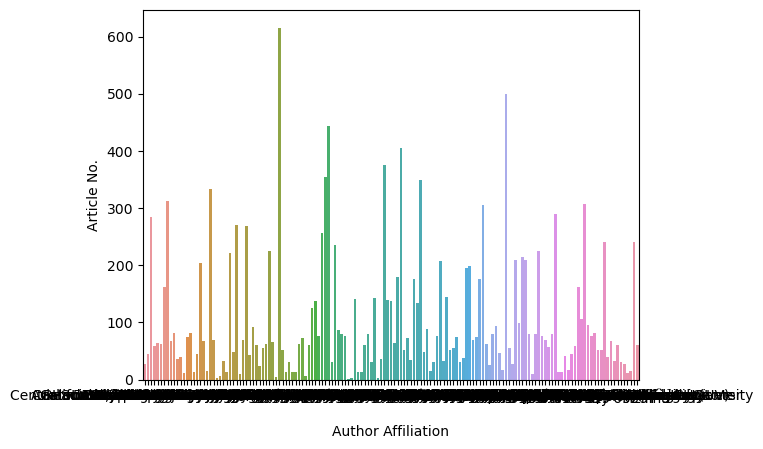

In [122]:
universityPublication = mergedFile.groupby('Author Affiliation')['Article No.'].sum()
# modifiedFrame.dtypes
universityPublication.head()
universityPublication.to_csv("publicationsPerSchool.csv")
pubPerSchool = pd.read_csv("publicationsPerSchool.csv")
pubPerSchool.head()
sns.barplot(x = "Author Affiliation", y = "Article No.", ci = None, data = pubPerSchool)

<AxesSubplot:xlabel='Author Name', ylabel='h-index'>

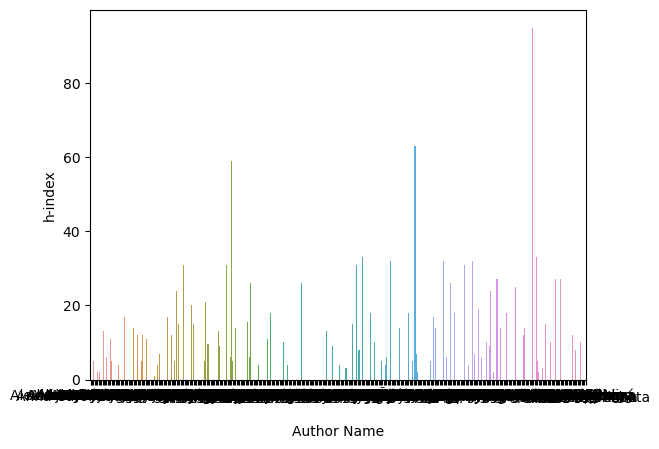

In [123]:


hIndex = mergedFile.groupby('Author Name')['h-index'].nlargest(n = 5, keep = 'first')
hIndex.to_csv("author-index.csv")
dF = pd.read_csv("author-index.csv")
dF.head()
sns.barplot(x = "Author Name", y = "h-index", ci = None, data = dF)




# Regression Analysis

In [124]:
df = pd.read_csv("data.csv")
df.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN
5,0,71,113,1,8,9,NaN
6,0,76,91,1,6,3,NaN
7,0,64,46,0,6,11,NaN
8,0,56,132,0,9,9,NaN
9,0,96,190,0,11,4,NaN


In [125]:
df.isna().sum()

Purchase          0
SUS               0
Duration          0
Gender            0
ASR_Error         0
Intent_Error      0
Unnamed: 6      100
dtype: int64

In [126]:
df = df.fillna(0)

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()

le.fit(df['Purchase'])
df['Purchase'] = le.transform(df['Purchase'])

le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

df.head()

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,0.0
1,0,58,247,0,6,9,0.0
2,0,56,125,1,6,8,0.0
3,0,55,22,0,11,7,0.0
4,1,95,262,0,2,3,0.0


1. Show the statistical results of your trained regression model.

In [129]:
df.corr(method = 'pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Unnamed: 6           NaN
Name: SUS, dtype: float64

2. What features are significant? What features are insignificant?
    Purchase and Gender are the most significant features. Purchase has a way higher significance compared to gender in relation to the SUS. Duration, ASR_Error, and Intent_Error are the features that are insignificant and have the least effect on the SUS.
    
3. Were the results what you expected? Explain why or why not, for each feature.
    The results weren't fully what I expected. I was expecting purchase to have a high correlation since the experience of making a purchase through siri would highly affect the SUS. By just looking at the data and the different types of independent variables, I thought duration would be one of the features that would have a higher correlation to SUS because when it comes to purchasing flight tickets, people usually look for the easiest, quickest, and most efficent way to purchase tickets.

4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.
    The factor that has the most influence on SUS is Purchase. In the statistical results shown for question 1, the purchase factor has the highest positive value and is closed to 1, which is the value for SUS. This means that Purchase has the highest correlation to SUS compared to the other factors.

5. What are the potential reasons for these factor(s) being significant predictors of SUS?
    In the end, it all comes down to the experiences that the user has had and how he or she feels about using Siri for purchasing flight tickets. Prior experiences can really affect the decisions people make in the future. Prior experiences people have had when it comes to making purchases through task-oriented dialogue systems can affect both their approach and decision. Duration can be a significant predictor of SUS because how long it takes them to complete the task will determine whether they found it quick and easy or very time consuming. Experiences with technology in general can also affect people reliability and trustworthiness towards such technology.

C:\Users\josht\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\josht\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


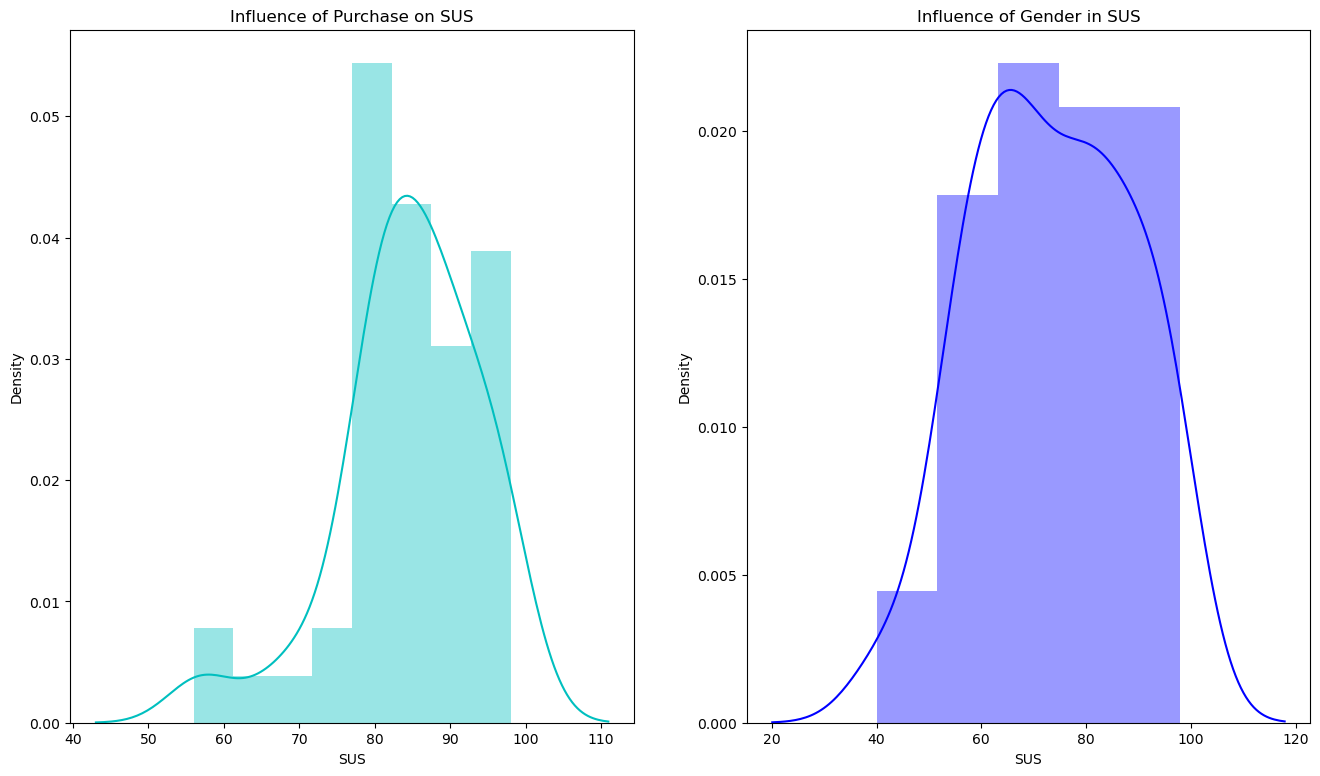

In [130]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(121)
sns.distplot(df.loc[df['Purchase'] == 1]['SUS'], color='c')
ax1.set_title('Influence of Purchase on SUS')

ax2 = fig.add_subplot(122)
sns.distplot(df.loc[df['Gender'] == 0]['SUS'], color='b')
ax2.set_title('Influence of Gender in SUS')

plt.show()

These figures help show the influence of Purchase and Gender on SUS.

# Classification

In [131]:
df = pd.read_csv('updatedData.csv')
df.head()

,Purchase,Duration,Gender,ASR_Error,Intent_Error
0,1,254,0,3,2
1,0,247,0,6,9
2,0,125,1,6,8
3,0,22,0,11,7
4,1,262,0,2,3


In [132]:
df.isna().sum()

Purchase        0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

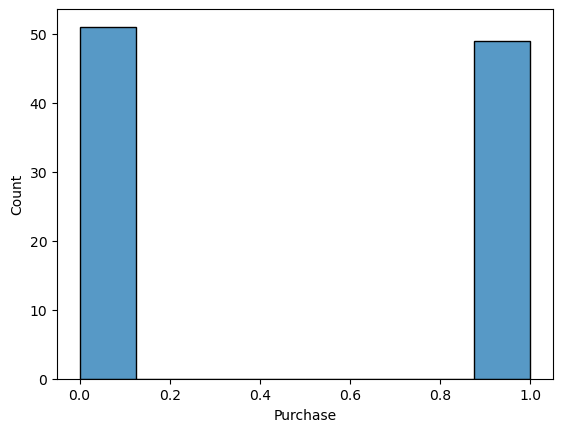

In [133]:
#Display number of purchases
sns.histplot(df['Purchase'], palette = 'bright')
plt.show()

In [134]:
y = df['Purchase'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [135]:
X = df.drop('Purchase', axis = 1).to_numpy()
X

array([[254,   0,   3,   2],
       [247,   0,   6,   9],
       [125,   1,   6,   8],
       [ 22,   0,  11,   7],
       [262,   0,   2,   3],
       [113,   1,   8,   9],
       [ 91,   1,   6,   3],
       [ 46,   0,   6,  11],
       [132,   0,   9,   9],
       [190,   0,  11,   4],
       [146,   0,   9,   7],
       [226,   0,   4,   4],
       [ 54,   1,   7,   9],
       [104,   0,   2,   3],
       [292,   0,   7,   3],
       [126,   0,   8,   9],
       [152,   1,   3,   5],
       [221,   0,   3,   4],
       [ 51,   0,   9,   9],
       [230,   0,   6,   8],
       [ 72,   1,   6,   8],
       [284,   0,   6,  11],
       [168,   0,   2,   4],
       [194,   0,   1,   3],
       [130,   1,  10,   1],
       [227,   0,   9,   3],
       [161,   1,   7,   8],
       [262,   1,   2,   3],
       [257,   1,   9,  11],
       [ 57,   1,   8,   3],
       [138,   0,   8,   9],
       [ 33,   1,   9,   4],
       [260,   0,   1,   2],
       [178,   1,   3,   4],
       [153,  

In [136]:
#Referencing Classification example from class lecture
#Data Scaling
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [137]:
#Referencing Classification example from class lecture
#Import Classifiers and Metrics from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [138]:
#Referencing Classification example from class lecture
#train ML model with training dataset

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [139]:
#Referencing Classification example from class lecture

lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [140]:
#Test ML model with testing dataset
#Referencing Classification example from class lecture

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Support Vector Machine
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted

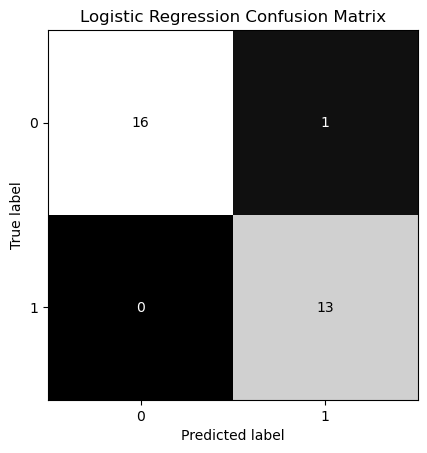

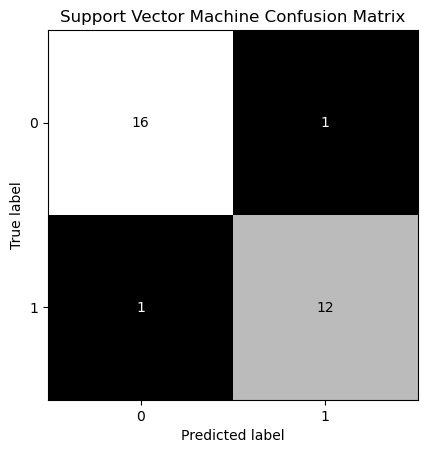

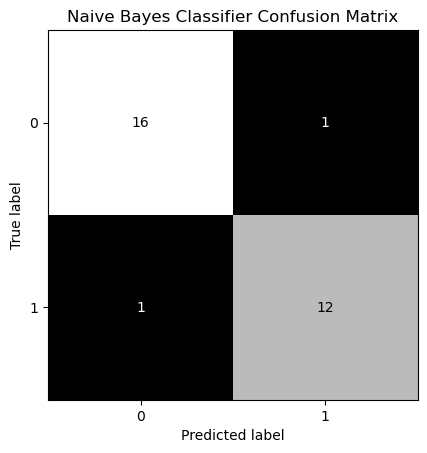

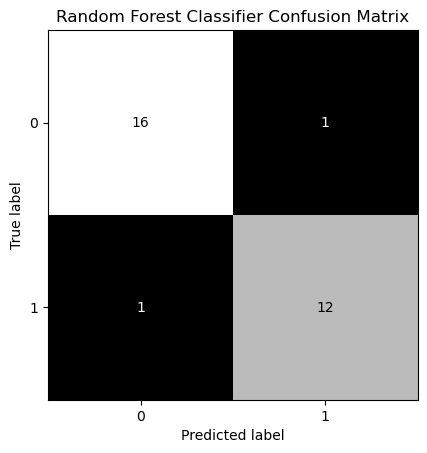

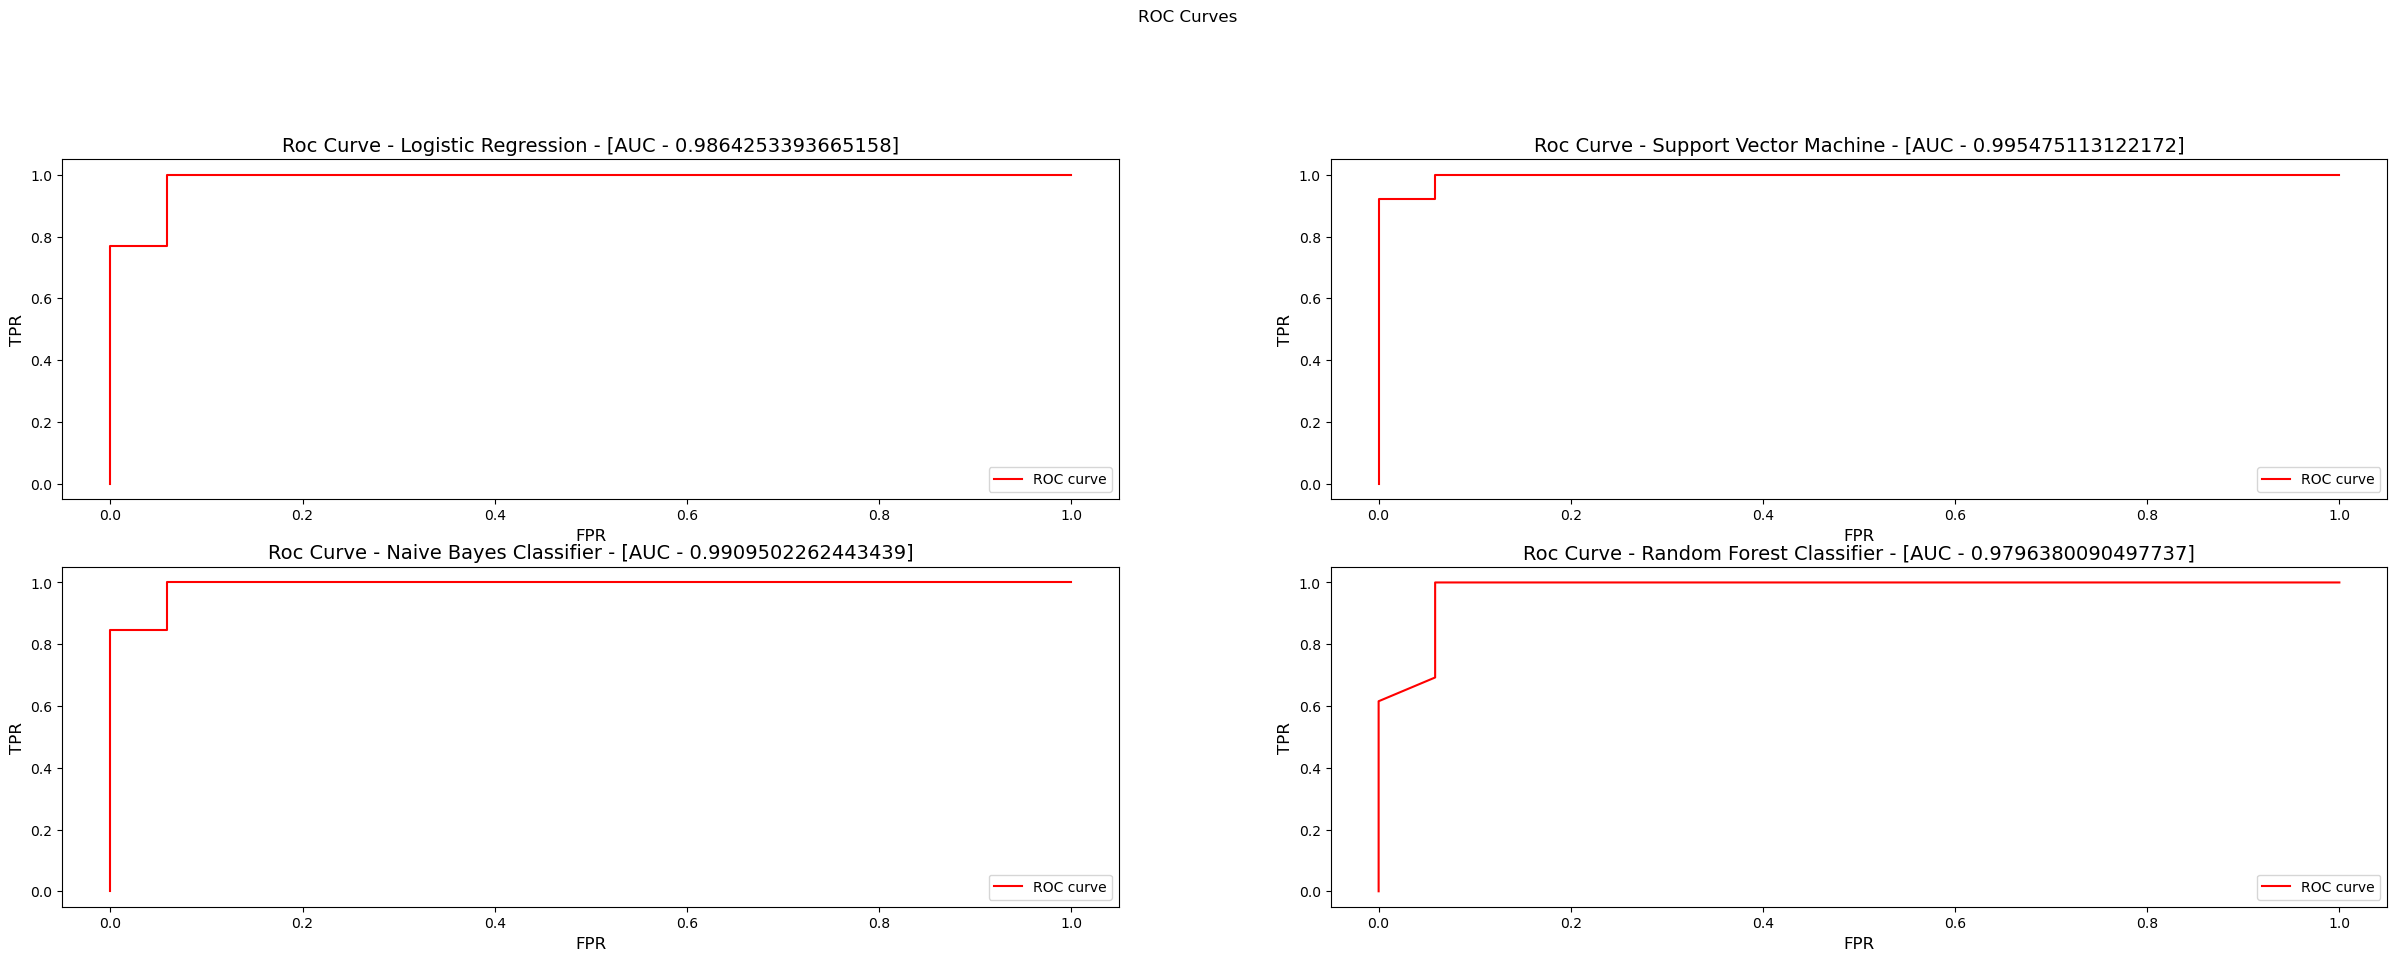

In [141]:
#Model evaluation with confusion matrix and ROC curve
#Referencing Classification example from class lecture
print('Logistic Regression')
print(classification_report(y_test, y_lc_predicted))
print('Support Vector Machine')
print(classification_report(y_test, y_svc_predicted))
print('Naive Bayes Classifier')
print(classification_report(y_test, y_nbc_predicted))
print('Random Forest Classifier')
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()